**Importing Libraries**

In [ ]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction

In [ ]:
# load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/M_F_comb.xlsx")

In [ ]:
df.head() # display dataset's 1st 5 rows

Samples  Gender Age_Group  ABCA4  ABCC6  ABHD12  ACBD5  ACO2  ADAMTS18  \
0  1_50:60_F  Female     50-60      0      0       0    253     0         0   
1  2_50:60_F  Female     50-60      0     76       0    239     0         0   
2  3_40:50_F  Female     40-50    148     55      88    257     0         0   
3  4_40:50_F  Female     40-50      0     70       0    228     0         0   
4  5_50:60_F  Female     50-60      0      0       0      0     0         0   

   ADGRA3  ...  USH1G  USH2A  VCAN  VEGFA  WDPCP  WDR19  WFS1  WHRN  ZNF408  \
0       0  ...      0    275     0     73    165      0     0     0       0   
1       0  ...      0    251     0      0    159      0     0     0       0   
2       0  ...     76    255     0     72    162     15     0     0       0   
3       0  ...     78      0     0      0    184      0     0     0       0   
4       0  ...     75    257     0     68    170      0     0     0       0   

   ZNF423  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 318 columns]

In [ ]:
df.tail() # display dataset's last 5 rows

Samples Gender Age_Group  ABCA4  ABCC6  ABHD12  ACBD5  ACO2  \
495  235_50:60_M   Male     50-60      0      0       0    241     0   
496  236_40:50_M   Male     40-50    163     78       0      0     0   
497  237_50:60_M   Male     50-60    144      0       0    260     0   
498  238_40:50_M   Male     40-50      0      0       0    240     0   
499  239_50:60_M   Male     50-60      0     67       0    238     0   

     ADAMTS18  ADGRA3  ...  USH1G  USH2A  VCAN  VEGFA  WDPCP  WDR19  WFS1  \
495         0       0  ...      0      0     0     87    174      0     0   
496         0       0  ...      0    256     0      0      0      0     0   
497         0       0  ...      0    256     0     96    162      0     0   
498         0       0  ...      0    259     0     78    181      0     0   
499         0       0  ...      0      0     0     81    165     41     0   

     WHRN  ZNF408  ZNF423  
495    22       0       0  
496     0       0       0  
497    42       0       0  
498     0       0       0  
499     0       0       0  

[5 rows x 318 columns]

In [ ]:
print(df.shape)   # dataset rows & columns
df.columns        # columns of the dataset

(500, 318)


Index(['Samples', 'Gender', 'Age_Group', 'ABCA4', 'ABCC6', 'ABHD12', 'ACBD5',
       'ACO2', 'ADAMTS18', 'ADGRA3',
       ...
       'USH1G', 'USH2A', 'VCAN', 'VEGFA', 'WDPCP', 'WDR19', 'WFS1', 'WHRN',
       'ZNF408', 'ZNF423'],
      dtype='object', length=318)

In [ ]:
print(list(df.columns))     # columns

['Samples', 'Gender', 'Age_Group', 'ABCA4', 'ABCC6', 'ABHD12', 'ACBD5', 'ACO2', 'ADAMTS18', 'ADGRA3', 'ADGRV1', 'ADH1C', 'ADH7', 'ADIPOR1', 'AFG3L2', 'AGBL5', 'AHI1', 'AHR', 'AIPL1', 'ALDH1A2', 'ALDH1A3', 'ALDH8A1', 'ALMS1', 'APC', 'APOD', 'APOE', 'ARHGEF18', 'ARL2BP', 'ARL3', 'ARL6', 'ARMS2', 'ARSG', 'ASRGL1', 'ATXN7', 'BBIP1', 'BBS1', 'BBS10', 'BBS12', 'BBS2', 'BBS4', 'BBS5', 'BBS7', 'BBS9', 'BEST1', 'C1QTNF5', 'C2', 'C3', 'C8orf37', 'CA4', 'CABP4', 'CACNA1F', 'CAPN5', 'CC2D2A', 'CCT2', 'CD36', 'CDH23', 'CDH3', 'CEP164', 'CEP19', 'CEP250', 'CEP290', 'CEP78', 'CERKL', 'CFB', 'CFD', 'CFH', 'CFHR1', 'CHM', 'CIB2', 'CLCC1', 'CLN3', 'CLRN1', 'CLUAP1', 'CNGA1', 'CNGA3', 'CNGB1', 'CNGB3', 'CNNM4', 'COL11A1', 'COL2A1', 'COL9A1', 'COPB2', 'COX1 ', 'COX2', 'CRB1', 'CRX', 'CSPP1', 'CTNNA1', 'CWC27', 'CYP27A1', 'CYP4V2', 'CYSLT1R', 'DHDDS', 'DHRS13', 'DHRS3', 'DHRS4', 'DHRS9', 'DHX38', 'DMD', 'DRAM2', 'DTHD1', 'DYNC2H1', 'DYNC2I2', 'EFEMP1', 'ELOVL1', 'ELOVL4', 'EMC1', 'ENSA', 'ERCC6', 'ESPN', '

In [ ]:
df.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 318 entries, Samples to ZNF423
dtypes: int64(315), object(3)
memory usage: 1.2+ MB


In [ ]:
# looking for missing values
df.isnull().sum()

Samples      0
Gender       0
Age_Group    0
ABCA4        0
ABCC6        0
            ..
WDR19        0
WFS1         0
WHRN         0
ZNF408       0
ZNF423       0
Length: 318, dtype: int64

In [ ]:
# looking for duplicate values
df.duplicated().sum()

0

In [ ]:
from sklearn.impute import KNNImputer

# Identify protein columns
protein_columns_imp = df.columns[3:]

# Replace 0s with NaN in the protein columns
df[protein_columns_imp] = df[protein_columns_imp].replace(0, np.nan)

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df[protein_columns_imp] = imputer.fit_transform(df[protein_columns_imp])


In [ ]:
# Check the imputed dataset
df.head()

Samples  Gender Age_Group  ABCA4  ABCC6  ABHD12  ACBD5   ACO2  ADAMTS18  \
0  1_50:60_F  Female     50-60  148.6   64.6    85.0  253.0  102.4      41.4   
1  2_50:60_F  Female     50-60  146.8   76.0    80.6  239.0   97.4      37.8   
2  3_40:50_F  Female     40-50  148.0   55.0    88.0  257.0   91.4      38.4   
3  4_40:50_F  Female     40-50  149.0   70.0    73.4  228.0  100.4      43.0   
4  5_50:60_F  Female     50-60  152.6   74.2    84.6  250.8   98.8      35.8   

   ADGRA3  ...  USH1G  USH2A  VCAN  VEGFA  WDPCP  WDR19  WFS1  WHRN  ZNF408  \
0    70.6  ...   83.8  275.0  56.4   73.0  165.0   22.4  79.4  42.6    74.6   
1    69.4  ...   85.4  251.0  55.8   67.0  159.0   26.6  75.6  47.2    74.8   
2    72.6  ...   76.0  255.0  59.0   72.0  162.0   15.0  81.2  47.2    73.2   
3    75.2  ...   78.0  260.4  48.6   71.0  184.0   31.0  81.2  47.6    78.2   
4    63.8  ...   75.0  257.0  59.0   68.0  170.0   23.4  73.0  42.2    74.4   

   ZNF423  
0    56.0  
1    55.6  
2    62.2  
3    52.6  
4    60.8  

[5 rows x 318 columns]

In [ ]:
df.describe().T       # columns statistical analysis

count      mean       std    min     25%    50%    75%    max
ABCA4   500.0  152.2204  8.142970  133.0  146.00  152.0  158.4  173.0
ABCC6   500.0   73.0436  8.142948   53.0   67.00   72.8   78.4   93.0
ABHD12  500.0   82.4584  3.683418   65.0   80.60   82.6   84.8   99.0
ACBD5   500.0  244.5780  7.159824  228.0  240.55  244.8  249.0  261.0
ACO2    500.0   90.9420  8.415012   69.0   83.40   93.0   98.6  110.0
...       ...       ...       ...    ...     ...    ...    ...    ...
WDR19   500.0   28.7000  5.403576   11.0   24.80   28.6   32.0   44.0
WFS1    500.0   83.2940  6.818885   64.0   77.60   82.0   89.2   99.0
WHRN    500.0   38.4220  7.422735   19.0   32.20   39.0   44.4   57.0
ZNF408  500.0   70.9952  4.352575   56.0   68.40   71.8   74.0   84.0
ZNF423  500.0   64.1132  7.439745   49.0   57.00   63.0   71.4   85.0

[315 rows x 8 columns]

In [ ]:
df.describe().T.iloc[0:150]

count      mean        std    min     25%    50%    75%    max
ABCA4     500.0  152.2204   8.142970  133.0  146.00  152.0  158.4  173.0
ABCC6     500.0   73.0436   8.142948   53.0   67.00   72.8   78.4   93.0
ABHD12    500.0   82.4584   3.683418   65.0   80.60   82.6   84.8   99.0
ACBD5     500.0  244.5780   7.159824  228.0  240.55  244.8  249.0  261.0
ACO2      500.0   90.9420   8.415012   69.0   83.40   93.0   98.6  110.0
...         ...       ...        ...    ...     ...    ...    ...    ...
KCNJ13    500.0  106.4044   6.579648   87.0  102.40  106.8  111.0  123.0
KCNV2     500.0   45.0892   6.018725   26.0   40.60   45.6   49.4   63.0
KIAA1549  500.0  102.1572   5.521219   83.0   98.95  102.2  105.2  120.0
KIF11     500.0   58.4384   4.030978   40.0   56.40   58.6   61.2   69.0
KIF3B     500.0   73.1764  10.097497   51.0   65.60   73.1   81.0   98.0

[150 rows x 8 columns]

In [ ]:
df.describe().T.iloc[150:]

count      mean        std    min     25%    50%     75%    max
KIZ     500.0   67.6748   5.898779   51.0   62.95   68.9   71.80   87.0
KLHL7   500.0  177.1364  10.815577  155.0  169.70  177.0  184.70  200.0
KSS     500.0  110.7224   5.089001   95.0  107.80  110.7  114.00  126.0
LAMA1   500.0   50.4636   4.680274   38.0   46.80   49.8   53.85   69.0
LCA5    500.0  151.2444   9.350354  132.0  144.30  151.0  158.00  172.0
...       ...       ...        ...    ...     ...    ...     ...    ...
WDR19   500.0   28.7000   5.403576   11.0   24.80   28.6   32.00   44.0
WFS1    500.0   83.2940   6.818885   64.0   77.60   82.0   89.20   99.0
WHRN    500.0   38.4220   7.422735   19.0   32.20   39.0   44.40   57.0
ZNF408  500.0   70.9952   4.352575   56.0   68.40   71.8   74.00   84.0
ZNF423  500.0   64.1132   7.439745   49.0   57.00   63.0   71.40   85.0

[165 rows x 8 columns]

<ipython-input-16-400a275466e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Dark2')


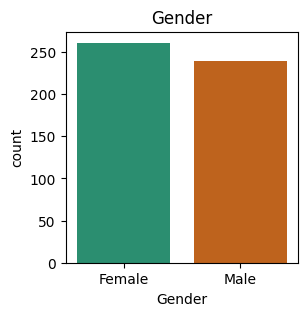

Gender
Female    261
Male      239
Name: count, dtype: int64

In [ ]:
# Count plot for Gender column
plt.figure(figsize=(3, 3))
sns.countplot(x='Gender', data=df, palette='Dark2')
plt.title('Gender')
plt.show()
df.value_counts('Gender')

<ipython-input-17-484a1fa65af4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='flare')


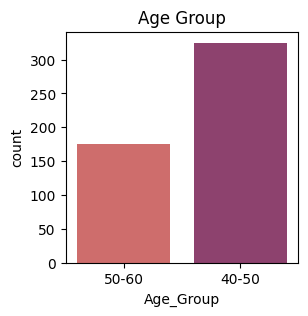

Age_Group
40-50    325
50-60    175
Name: count, dtype: int64

In [ ]:
# Count plot for Age column
plt.figure(figsize=(3, 3))
sns.countplot(x='Age_Group', data=df, palette='flare')
plt.title('Age Group')
plt.show()
df.value_counts('Age_Group')

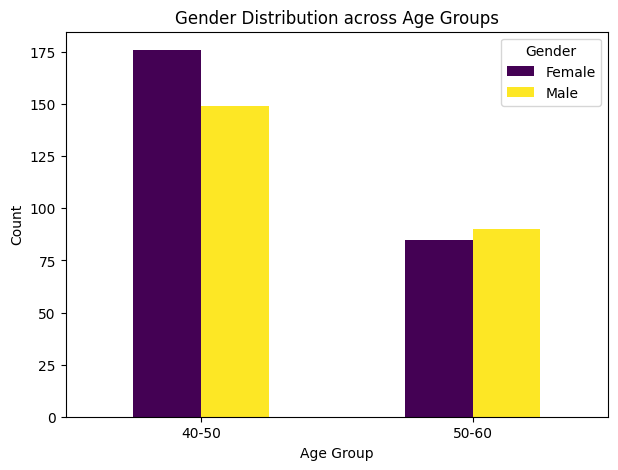

In [ ]:
# visualize gender distribution across age groups

age_gender_crosstab = pd.crosstab(df['Age_Group'], df['Gender'])
age_gender_crosstab.plot(kind='bar', colormap='viridis', figsize=(7, 5))
plt.title('Gender Distribution across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Data distribution of all columns
# Number of columns to be plotted
num_columns = len(df.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [ ]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df.columns[3:]:
    expression_data = df[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'Std Dev (%)': std_dev_percentage
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [ ]:
protein_stats_df

Frequency (%)  Mean Expression  Standard Deviation  Std Dev (%)
ABCA4           100.0          152.220               8.143        5.349
ABCC6           100.0           73.044               8.143       11.148
ABHD12          100.0           82.458               3.683        4.467
ACBD5           100.0          244.578               7.160        2.927
ACO2            100.0           90.942               8.415        9.253
...               ...              ...                 ...          ...
WDR19           100.0           28.700               5.404       18.829
WFS1            100.0           83.294               6.819        8.187
WHRN            100.0           38.422               7.423       19.320
ZNF408          100.0           70.995               4.353        6.131
ZNF423          100.0           64.113               7.440       11.605

[315 rows x 4 columns]

In [ ]:
protein_stats_df.iloc[:100]

Frequency (%)  Mean Expression  Standard Deviation  Std Dev (%)
ABCA4            100.0          152.220               8.143        5.349
ABCC6            100.0           73.044               8.143       11.148
ABHD12           100.0           82.458               3.683        4.467
ACBD5            100.0          244.578               7.160        2.927
ACO2             100.0           90.942               8.415        9.253
...                ...              ...                 ...          ...
DMD              100.0           54.406               5.514       10.135
DRAM2            100.0           39.392               5.541       14.066
DTHD1            100.0           31.732               4.828       15.215
DYNC2H1          100.0           76.889               5.229        6.801
DYNC2I2          100.0           56.615               5.090        8.991

[100 rows x 4 columns]

In [ ]:
protein_stats_df.iloc[100:200]

Frequency (%)  Mean Expression  Standard Deviation  Std Dev (%)
EFEMP1          100.0          121.492               6.942        5.714
ELOVL1          100.0          113.340               7.036        6.208
ELOVL4          100.0           33.571               4.176       12.439
EMC1            100.0           60.690               3.655        6.022
ENSA            100.0           85.537               3.282        3.837
...               ...              ...                 ...          ...
OAT             100.0           74.756               3.504        4.687
OFD1            100.0           62.450               4.435        7.102
OPA1            100.0           36.121               6.811       18.856
OPA3            100.0           55.140               8.506       15.426
OPN1LW          100.0           75.312               5.135        6.818

[100 rows x 4 columns]

In [ ]:
protein_stats_df.iloc[200:]

Frequency (%)  Mean Expression  Standard Deviation  Std Dev (%)
OPN1MW          100.0           68.648               4.621        6.731
OPN1SW          100.0           69.233              10.602       15.314
OTX2            100.0           37.907               4.677       12.338
PANK2           100.0           59.681               8.961       15.015
PAX2            100.0           46.853               2.778        5.929
...               ...              ...                 ...          ...
WDR19           100.0           28.700               5.404       18.829
WFS1            100.0           83.294               6.819        8.187
WHRN            100.0           38.422               7.423       19.320
ZNF408          100.0           70.995               4.353        6.131
ZNF423          100.0           64.113               7.440       11.605

[115 rows x 4 columns]

In [ ]:
# Sorting the DataFrame to identify most expressed proteins
sorted_proteins = protein_stats_df.sort_values(by='Frequency (%)', ascending=False)

# Select the top 90 most expressed proteins
top_90_proteins_df = sorted_proteins[['Frequency (%)']].head(90)

# Display the new DataFrame
top_90_proteins_df


Frequency (%)
ABCA4             100.0
PCYT1A            100.0
PEX1              100.0
PDZD7             100.0
PDE6H             100.0
...                 ...
TMEM216           100.0
TMEM126A          100.0
TLR4              100.0
TIMP3             100.0
TRPM1             100.0

[90 rows x 1 columns]

We calculated the frequency of each protein for the respective gender. Among the 500 patients, there are 261 female and 239 male samples. Furthermore, we displayed the top 10 most highly expressed proteins for both males and females.

In [ ]:
# Dictionary to store results for each protein
protein_stats_M_F = {}

# Loop through each protein column
for protein in df.columns[3:]:
    protein_stats_M_F[protein] = {}

    # Calculate frequency for each gender
    for gender in df['Gender'].unique():
        gender_data = df[df['Gender'] == gender][protein]
        gender_frequency = round((gender_data > 0).sum() / len(gender_data) * 100, 3)
        protein_stats_M_F[protein][f'{gender} Frequency (%)'] = gender_frequency

# Convert to DataFrame
protein_stats_M_F_df = pd.DataFrame(protein_stats_M_F).T


In [ ]:
protein_stats_M_F_df

Female Frequency (%)  Male Frequency (%)
ABCA4                  100.0               100.0
ABCC6                  100.0               100.0
ABHD12                 100.0               100.0
ACBD5                  100.0               100.0
ACO2                   100.0               100.0
...                      ...                 ...
WDR19                  100.0               100.0
WFS1                   100.0               100.0
WHRN                   100.0               100.0
ZNF408                 100.0               100.0
ZNF423                 100.0               100.0

[315 rows x 2 columns]

In [ ]:
# Sorting the DataFrame to identify most expressed proteins
sorted_male_proteins = protein_stats_M_F_df.sort_values(by='Male Frequency (%)', ascending=False)
sorted_female_proteins = protein_stats_M_F_df.sort_values(by='Female Frequency (%)', ascending=False)

# Display the top 10 most expressed proteins for each group
print("Top 10 proteins most expressed in Males:")
print(sorted_male_proteins[['Male Frequency (%)']].head(10))

print("\nTop 10 proteins most expressed in Females:")
print(sorted_female_proteins[['Female Frequency (%)']].head(10))

Top 10 proteins most expressed in Males:
        Male Frequency (%)
ABCA4                100.0
PCYT1A               100.0
PEX1                 100.0
PDZD7                100.0
PDE6H                100.0
PDE6G                100.0
PDE6C                100.0
PDE6B                100.0
PDE6A                100.0
PCDH15               100.0

Top 10 proteins most expressed in Females:
        Female Frequency (%)
ABCA4                  100.0
PCYT1A                 100.0
PEX1                   100.0
PDZD7                  100.0
PDE6H                  100.0
PDE6G                  100.0
PDE6C                  100.0
PDE6B                  100.0
PDE6A                  100.0
PCDH15                 100.0


We calculated the frequency of each protein for the respective age group. Among the 500 patients, there are 325 samples from the 40-50 age group and 175 samples from the 50-60 age group. Furthermore, we displayed the top 10 most highly expressed proteins for both age groups.

In [ ]:
# Dictionary to store results for each protein
protein_stats_AG = {}

# Loop through each protein column
for protein in df.columns[3:]:
    protein_stats_AG[protein] = {}

    # Calculate frequency for each age group
    for age in df['Age_Group'].unique():
        age_data = df[df['Age_Group'] == age][protein]
        age_frequency = round((age_data > 0).sum() / len(age_data) * 100, 3)
        protein_stats_AG[protein][f'{age} Frequency (%)'] = age_frequency

# Convert to DataFrame
protein_stats_AG_df = pd.DataFrame(protein_stats_AG).T


In [ ]:
protein_stats_AG_df

50-60 Frequency (%)  40-50 Frequency (%)
ABCA4                 100.0                100.0
ABCC6                 100.0                100.0
ABHD12                100.0                100.0
ACBD5                 100.0                100.0
ACO2                  100.0                100.0
...                     ...                  ...
WDR19                 100.0                100.0
WFS1                  100.0                100.0
WHRN                  100.0                100.0
ZNF408                100.0                100.0
ZNF423                100.0                100.0

[315 rows x 2 columns]

In [ ]:
# Sorting the DataFrame to identify most expressed proteins
sorted_age_40_50_proteins = protein_stats_AG_df.sort_values(by='40-50 Frequency (%)', ascending=False)
sorted_age_50_60_proteins = protein_stats_AG_df.sort_values(by='50-60 Frequency (%)', ascending=False)

# Display the top 10 most expressed proteins for each group
print("Top 10 proteins most expressed in Age Group 40-50:")
print(sorted_age_40_50_proteins[['40-50 Frequency (%)']].head(10))

print("\nTop 10 proteins most expressed in Age Group 50-60:")
print(sorted_age_50_60_proteins[['50-60 Frequency (%)']].head(10))

Top 10 proteins most expressed in Age Group 40-50:
        40-50 Frequency (%)
ABCA4                 100.0
PCYT1A                100.0
PEX1                  100.0
PDZD7                 100.0
PDE6H                 100.0
PDE6G                 100.0
PDE6C                 100.0
PDE6B                 100.0
PDE6A                 100.0
PCDH15                100.0

Top 10 proteins most expressed in Age Group 50-60:
        50-60 Frequency (%)
ABCA4                 100.0
PCYT1A                100.0
PEX1                  100.0
PDZD7                 100.0
PDE6H                 100.0
PDE6G                 100.0
PDE6C                 100.0
PDE6B                 100.0
PDE6A                 100.0
PCDH15                100.0


Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [ ]:
# Segregate data by gender and age group
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

age_40_50 = df[df['Age_Group'] == '40-50']
age_50_60 = df[df['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['ABCA4', 'ABCC6', 'ABHD12', 'ACBD5', 'ACO2', 'ADAMTS18', 'ADGRA3', 'ADGRV1', 'ADH1C', 'ADH7', 'ADIPOR1', 'AFG3L2', 'AHI1', 'AHR', 'AIPL1', 'ALDH1A2', 'ALDH1A3', 'ALDH8A1', 'APC', 'APOD', 'APOE', 'ARHGEF18', 'ARL2BP', 'ARL3', 'ARL6', 'ARMS2', 'ARSG', 'ASRGL1', 'ATXN7', 'BBIP1', 'BBS1', 'BBS10', 'BBS12', 'BBS4', 'BBS5', 'BBS7', 'BBS9', 'C1QTNF5', 'C2', 'C3', 'C8orf37', 'CA4', 'CABP4', 'CACNA1F', 'CAPN5', 'CC2D2A', 'CCT2', 'CD36', 'CDH23', 'CDH3', 'CEP164', 'CEP19', 'CEP250', 'CEP290', 'CEP78', 'CERKL', 'CFB', 'CFD', 'CFH', 'CFHR1', 'CIB2', 'CLCC1', 'CLN3', 'CLRN1', 'CLUAP1', 'CNGA1', 'CNGA3', 'CNGB1', 'CNGB3', 'CNNM4', 'COL11A1', 'COL2A1', 'COL9A1', 'COPB2', 'COX1 ', 'COX2', 'CRB1', 'CRX', 'CSPP1', 'CTNNA1', 'CWC27', 'CYP27A1', 'CYP4V2', 'CYSLT1R', 'DHDDS', 'DHRS13', 'DHRS3', 'DHRS4', 'DHRS9', 'DHX38', 'DMD', 'DRAM2', 'DTHD1', 'DYNC2H1', 'DYNC2I2', 'EFEMP1', 'ELOVL1', 'ELOVL4', 'EMC1', 'ENSA', 'ERCC6', 'ESPN', 'EXOSC2', 'EYS', 'FAM1

In [ ]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 295
Number of significant proteins: 9


Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [ ]:
p_columns = df.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df.copy()
df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

        Highly Expressed  Lowly Expressed  Moderately Expressed
ABCA4                 71              107                   322
ABCC6                 78               80                   342
ABHD12                17                9                   474
ACBD5                 85               79                   336
ACO2                 154               79                   267
...                  ...              ...                   ...
WDR19                 75               33                   392
WFS1                 154               41                   305
WHRN                 106               78                   316
ZNF408                56               35                   409
ZNF423                 4              197                   299

[315 rows x 3 columns]


In [ ]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']

In [ ]:
summary_df.iloc[:150]

Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0       ABCA4                71              107                   322
1       ABCC6                78               80                   342
2      ABHD12                17                9                   474
3       ACBD5                85               79                   336
4        ACO2               154               79                   267
..        ...               ...              ...                   ...
145    KCNJ13                86               51                   363
146     KCNV2                58               50                   392
147  KIAA1549                53               36                   411
148     KIF11               168               11                   321
149     KIF3B                67              112                   321

[150 rows x 4 columns]

In [ ]:
summary_df.iloc[150:]

Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
150     KIZ                15              100                   385
151   KLHL7               103              111                   286
152     KSS                53               47                   400
153   LAMA1                 9              177                   314
154    LCA5                84              125                   291
..      ...               ...              ...                   ...
310   WDR19                75               33                   392
311    WFS1               154               41                   305
312    WHRN               106               78                   316
313  ZNF408                56               35                   409
314  ZNF423                 4              197                   299

[165 rows x 4 columns]

In [ ]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCA4                34               32                   173
1     ABCC6                42               55                   142
2    ABHD12                 2                8                   229
3     ACBD5                39               52                   148
4      ACO2                28               11                   200
..      ...               ...              ...                   ...
310   WDR19                44               14                   181
311    WFS1                73                4                   162
312    WHRN                16               33                   190
313  ZNF408                12               35                   192
314  ZNF423                 1               20                   218

[315 rows x 4 columns]

Summary for Females:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCA4                33         

In [ ]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCA4                42               62                   221
1     ABCC6                48               50                   227
2    ABHD12               177                2                   146
3     ACBD5                53               58                   214
4      ACO2                99               49                   177
..      ...               ...              ...                   ...
310   WDR19                39               47                   239
311    WFS1                95               23                   207
312    WHRN                76               52                   197
313  ZNF408                43               22                   260
314  ZNF423                 3              131                   191

[315 rows x 4 columns]

Summary for Age 50-60:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCA4              27.0   

Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

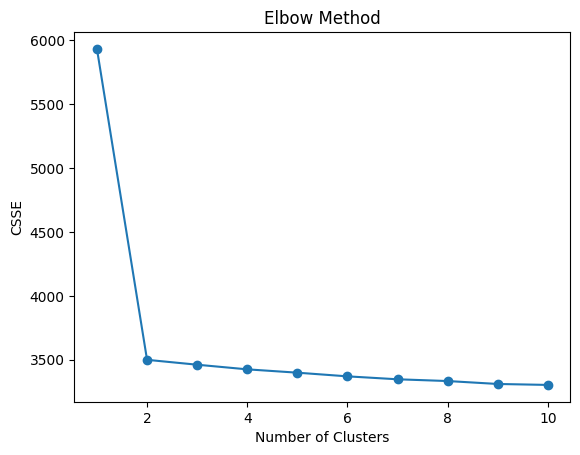

In [ ]:
pro_columns = df.columns[3:]

# Data Standardization/Normalization
#s_scaler = StandardScaler()
m_scaler = MinMaxScaler()
X = m_scaler.fit_transform(df[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [ ]:
csse

[5930.782865542615,
 3499.5247231558724,
 3461.2695186015585,
 3425.0378845173195,
 3398.925160192613,
 3370.217355520078,
 3347.2978183982123,
 3333.536672922716,
 3310.627656293248,
 3303.197880926206]

In [ ]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Samples  Gender Age_Group  ABCA4  ABCC6  ABHD12  ACBD5   ACO2  \
0      1_50:60_F  Female     50-60  148.6   64.6    85.0  253.0  102.4   
1      2_50:60_F  Female     50-60  146.8   76.0    80.6  239.0   97.4   
2      3_40:50_F  Female     40-50  148.0   55.0    88.0  257.0   91.4   
3      4_40:50_F  Female     40-50  149.0   70.0    73.4  228.0  100.4   
4      5_50:60_F  Female     50-60  152.6   74.2    84.6  250.8   98.8   
..           ...     ...       ...    ...    ...     ...    ...    ...   
495  235_50:60_M    Male     50-60  156.8   79.6    80.8  241.0   86.2   
496  236_40:50_M    Male     40-50  163.0   78.0    84.2  247.4   83.2   
497  237_50:60_M    Male     50-60  144.0   79.4    80.8  260.0   81.2   
498  238_40:50_M    Male     40-50  154.6   74.6    78.8  240.0   78.8   
499  239_50:60_M    Male     50-60  162.0   67.0    84.2  238.0   85.2   

     ADAMTS18  ADGRA3  ...  USH2A  VCAN  VEGFA  WDPCP  WDR19  WFS1  WHRN  \
0        41.4    70.6  ...  275.0  56.4   73.0  165.0   22.4  79.4  42.6   
1        37.8    69.4  ...  251.0  55.8   67.0  159.0   26.6  75.6  47.2   
2        38.4    72.6  ...  255.0  59.0   72.0  162.0   15.0  81.2  47.2   
3        43.0    75.2  ...  260.4  48.6   71.0  184.0   31.0  81.2  47.6   
4        35.8    63.8  ...  257.0  59.0   68.0  170.0   23.4  73.0  42.2   
..        ...     ...  ...    ...   ...    ...    ...    ...   ...   ...   
495      34.4    92.8  ...  258.2  28.2   87.0  174.0   37.4  92.8  22.0   
496      29.4    87.8  ...  256.0  32.6   88.4  166.0   30.2  84.4  38.0   
497      29.8    90.6  ...  256.0  33.0   96.0  162.0   33.4  87.2  42.0   
498      24.0    92.2  ...  259.0  25.6   78.0  181.0   31.8  95.4  32.2   
499      30.8    92.8  ...  250.8  32.8   81.0  165.0   41.0  93.2  35.4   

     ZNF408  ZNF423  Cluster  
0      74.6    56.0        1  
1      74.8    55.6        1  
2      73.2    62.2        1  
3      78.2    52.6        1  
4      74.4    60.8        1  
..      ...     ...      ...  
495    75.8    73.8        0  
496    68.6    70.4        0  
497    78.2    71.0        0  
498    72.4    69.8        0  
499    70.6    71.0        0  

[500 rows x 319 columns]

In [ ]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

Cluster
1    261
0    239
Name: count, dtype: int64

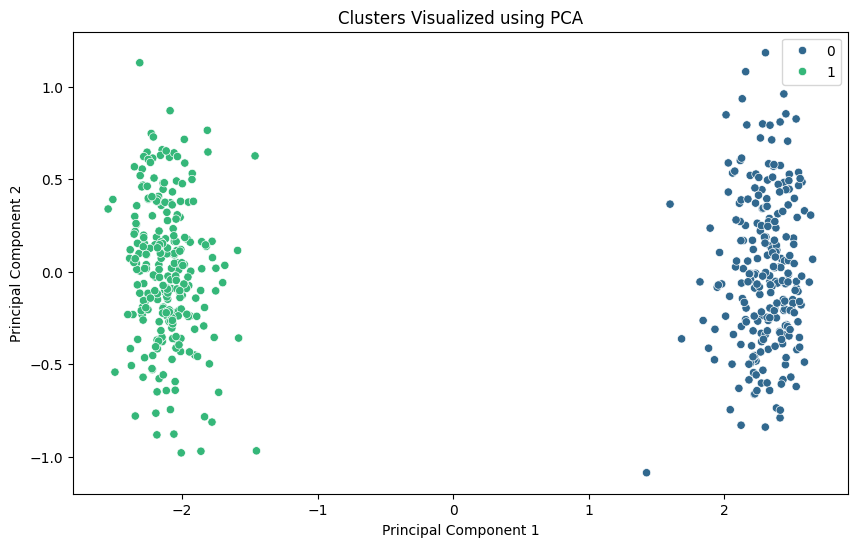

In [ ]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

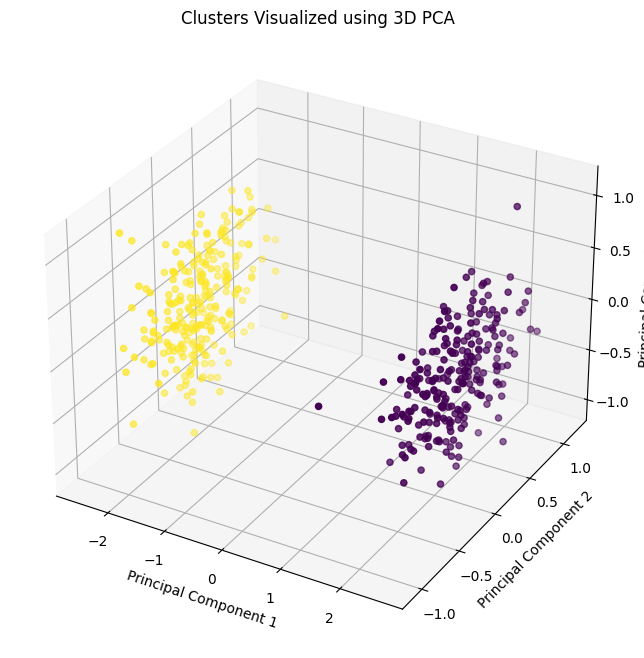

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
